## Link to GIT repository with the .ipynb file: https://github.com/rgouaz/HW5_Privacy/upload

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('heart.csv')
df2 = pd.read_csv('german_credit_data.csv')
df2 = pd.get_dummies(df2, drop_first=True)

# Split the dataset into training and test sets
features = df.drop('target', axis=1)
labels = df['target']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)
features2 = df2.drop('Credit amount', axis=1)
labels2 = df2['Credit amount']
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, labels2, test_size=0.1, random_state=42)


In [92]:
def k_anonymize(df, k):
    return df.round(-k)

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def train_and_evaluate(X_train, y_train, X_test, y_test):
    # Train the model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Make predictions on the test set and calculate the MSE
    predictions = lr.predict(X_test)
    mse = mean_squared_error(y_test, predictions)

    return mse


In [94]:
#for heart dataset
ks = range(0, 11)
mses = []

for k in ks:
    X_train_k = k_anonymize(X_train, k)
    mse = train_and_evaluate(X_train_k, y_train, X_test, y_test)
    mses.append(mse)

# For german credit dataset
mses2 = []

for k in ks:
    X_train_k2 = k_anonymize(X_train2, k)
    mse2 = train_and_evaluate(X_train_k2, y_train2, X_test2, y_test2)
    mses2.append(mse2)

In [95]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Reshape MSEs to 2D arrays
mses1 = np.array(mses).reshape(-1, 1)
mses2 = np.array(mses2).reshape(-1, 1)

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform
mses_scaled = scaler.fit_transform(mses1)
mses2_scaled = scaler.fit_transform(mses2)

# Convert back to list for plotting
mses_scaled = [item for sublist in mses_scaled for item in sublist]
mses2_scaled = [item for sublist in mses2_scaled for item in sublist]

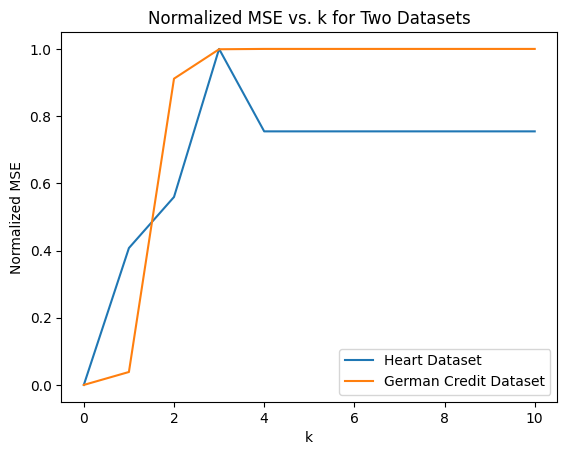

In [96]:
import matplotlib.pyplot as plt

# Plot the result
plt.plot(ks, mses_scaled, label='Heart Dataset')
plt.plot(ks, mses2_scaled, label='German Credit Dataset')
plt.xlabel('k')
plt.ylabel('Normalized MSE')
plt.title('Normalized MSE vs. k for Two Datasets')
plt.legend(loc='lower right')
plt.show()